In [1]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

# Imports
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import cv2
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import shutil


# Source from Drive
drive_folder = '/content/drive/MyDrive/traffic_sign_recognition_datatset'

# Local destination
local_folder = '/content/dataset'
os.makedirs(local_folder, exist_ok=True)

# Copy everything (Train/Test/Meta/CSVs)
print("Copying dataset from Drive to local... (~1-2 min)")
shutil.copytree(drive_folder, local_folder, dirs_exist_ok=True)
print("Copy complete! Now use local paths for loading.")

# Quick check
!ls /content/dataset/ | head -5

Mounted at /content/drive
Copying dataset from Drive to local... (~1-2 min)
Copy complete! Now use local paths for loading.
Meta
Meta.csv
Test
Test.csv
Train


In [2]:
# Load function
def load_gtsrb_data(data_dir, img_size=(32, 32), use_csv=False):
    images = []
    labels = []

    if use_csv:
        csv_path = os.path.join(data_dir, '..', 'Test.csv')
        df = pd.read_csv(csv_path)
        class_names = sorted(set(df['ClassId']))
        class_to_idx = {cls: idx for idx, cls in enumerate(class_names)}

        for _, row in df.iterrows():
            img_path = os.path.join(data_dir, row['Path'].split('/')[-1])
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img = cv2.resize(img, img_size)
                images.append(img)
                labels.append(class_to_idx[row['ClassId']])
    else:
        class_names = sorted([d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))])
        class_to_idx = {cls: int(cls) for cls in class_names}

        for class_id in class_names:
            class_path = os.path.join(data_dir, class_id)
            for img_name in os.listdir(class_path):
                img_path = os.path.join(class_path, img_name)
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                    img = cv2.resize(img, img_size)
                    images.append(img)
                    labels.append(class_to_idx[class_id])

    return np.array(images), np.array(labels), class_names

# Updated paths: Local now
train_dir = '/content/dataset/Train'
test_dir = '/content/dataset/Test'

# Load
X_train, y_train, class_names = load_gtsrb_data(train_dir)
X_test, y_test, _ = load_gtsrb_data(test_dir, use_csv=True)

# Preprocess
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
y_train_cat = keras.utils.to_categorical(y_train, 43)
y_test_cat = keras.utils.to_categorical(y_test, 43)
X_train, X_val, y_train_cat, y_val_cat = train_test_split(X_train, y_train_cat, test_size=0.2, random_state=42, stratify=y_train)

print(f"Loaded locally: Train {X_train.shape}, Val {X_val.shape}, Test {X_test.shape}")

Loaded locally: Train (31367, 32, 32, 3), Val (7842, 32, 32, 3), Test (12630, 32, 32, 3)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 43)             │         5,547 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,427,499 (9.26 MB)

 Trainable params: 169,515 (662.17 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 35s 20ms/step - accuracy: 0.0484 - loss: 3.7328 - val_accuracy: 0.0605 - val_loss: 3.5168
Epoch 2/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.0498 - loss: 3.5767 - val_accuracy: 0.0605 - val_loss: 3.4984
Epoch 3/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.0493 - loss: 3.5409 - val_accuracy: 0.0605 - val_loss: 3.4934
Epoch 4/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.0459 - loss: 3.5396 - val_accuracy: 0.0670 - val_loss: 3.4853
Epoch 5/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.0568 - loss: 3.5324 - val_accuracy: 0.0565 - val_loss: 3.4920
Epoch 6/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.0530 - loss: 3.5189 - val_accuracy: 0.0550 - val_loss: 3.4878
Epoch 7/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - accuracy: 0.0508 - loss: 3.5224 - val_accuracy: 0.0565 - val_loss: 3.4826
Epoch 8/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 17ms/step - accuracy: 0.0496 -

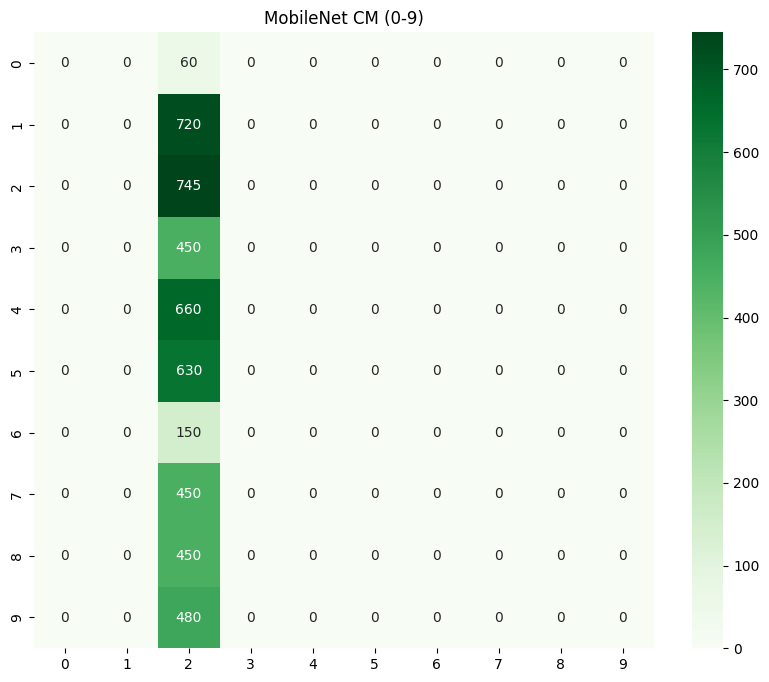

              precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00        60
     Class 1       0.00      0.00      0.00       720
     Class 2       0.06      0.99      0.11       750
     Class 3       0.00      0.00      0.00       450
     Class 4       0.00      0.00      0.00       660
     Class 5       0.00      0.00      0.00       630
     Class 6       0.00      0.00      0.00       150
     Class 7       0.00      0.00      0.00       450
     Class 8       0.00      0.00      0.00       450
     Class 9       0.00      0.00      0.00       480
    Class 10       0.00      0.00      0.00       660
    Class 11       0.00      0.00      0.00       420
    Class 12       0.00      0.00      0.00       690
    Class 13       0.00      0.00      0.00       720
    Class 14       0.00      0.00      0.00       270
    Class 15       0.00      0.00      0.00       210
    Class 16       0.00      0.00      0.00       150
    Class 17       0.00    

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [4]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import tensorflow as tf

# Subset (same)
train_size = 10000
X_train_small = X_train[:train_size]
y_train_cat_small = y_train_cat[:train_size]
X_val_small = X_val[:2000]
y_val_cat_small = y_val_cat[:2000]

# Milder aug function
def augment_and_preprocess(image, label):
    # Small transforms only
    image = tf.image.rot90(image, 0)  # No random rot90—too harsh
    image = tf.image.random_brightness(image, 0.1)
    image = tf.image.random_contrast(image, 0.9, 1.1)
    image = tf.image.resize_with_crop_or_pad(image, 224, 224)  # Simple pad/resize
    image = tf.image.random_crop(image, [224, 224, 3])  # Slight crop for variation
    image = preprocess_input(image)
    return image, label

def preprocess_only(image, label):
    image = tf.image.resize(image, [224, 224])
    image = preprocess_input(image)
    return image, label

# Datasets (same as before)
batch_size = 8
train_ds = tf.data.Dataset.from_tensor_slices((X_train_small, y_train_cat_small))
train_ds = train_ds.map(augment_and_preprocess, num_parallel_calls=tf.data.AUTOTUNE)
train_ds = train_ds.shuffle(1000).batch(batch_size).prefetch(tf.data.AUTOTUNE)

val_ds = tf.data.Dataset.from_tensor_slices((X_val_small, y_val_cat_small))
val_ds = val_ds.map(preprocess_only, num_parallel_calls=tf.data.AUTOTUNE)
val_ds = val_ds.batch(batch_size).prefetch(tf.data.AUTOTUNE)

test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test_cat))
test_ds = test_ds.map(preprocess_only, num_parallel_calls=tf.data.AUTOTUNE)
test_ds = test_ds.batch(batch_size).prefetch(tf.data.AUTOTUNE)

# Model with lower LR
def build_mobilenet(input_shape=(224, 224, 3), num_classes=43):
    base_model = keras.applications.MobileNetV2(input_shape=input_shape, include_top=False, weights='imagenet')
    base_model.trainable = False
    model = keras.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model_mobilenet = build_mobilenet()
model_mobilenet.summary()

# Train
epochs = 15
history = model_mobilenet.fit(train_ds, epochs=epochs, validation_data=val_ds, verbose=1)

# Optional: Unfreeze top layers for better performance (run after initial training)
# base_model.trainable = True
# for layer in base_model.layers[:-20]:  # Freeze bottom, unfreeze top 20
#     layer.trainable = False
# model_mobilenet.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])
# history_fine = model_mobilenet.fit(train_ds, epochs=5, validation_data=val_ds, verbose=1)

# Evaluate
test_loss, test_acc = model_mobilenet.evaluate(test_ds, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")

# Predictions & Report (same)
y_pred = model_mobilenet.predict(test_ds, verbose=0)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_int = np.argmax(y_test_cat, axis=1)

cm = confusion_matrix(y_test_int, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm[:10, :10], annot=True, fmt='d', cmap='Greens')
plt.title('MobileNet CM (0-9)')
plt.show()

print(classification_report(y_test_int, y_pred_classes, target_names=[f'Class {i}' for i in range(43)]))

* Mode Collapse to Single Class: The model defaults to predicting almost everything as Class 2 ("Speed limit 50km/h"), leading to high recall (0.99) but low precision (0.06) for that class, and zero for others—explaining the 6% accuracy as ~750 correct predictions from Class 2 out of 12K tests.
* Upscaling Artifacts: Resizing low-res 32x32 images to 224x224 introduces blur and interpolation noise, confusing ImageNet-pretrained features designed for high-res natural images, not sharp traffic symbols.
* Frozen Base Limitations: The pre-trained MobileNetV2 backbone doesn't adapt well to traffic signs (domain shift from objects to symbols/shapes), and the shallow head (128-unit Dense) can't compensate, causing the classifier to "give up" and bias toward the first learned pattern.
* Augmentation Overkill: Even mild transforms (brightness, contrast, crop) on upscaled low-res data amplify noise, making augmented samples unrecognizable and preventing diverse learning across 43 classes.
* Subset Imbalance: The 10K train subset likely over-represents common classes like 2, exacerbating bias; full dataset might dilute it but still needs fine-tuning.
* Training Stagnation: Loss stuck at ~3.5 and acc ~5-6% indicate no convergence—random guessing baseline is 2.3%, so it's barely learning, highlighting transfer learning's risks without fine-tuning.
* Comparison Insight: The custom CNN (96%) succeeds because it's lightweight and trained from scratch on native 32x32 resolution, avoiding pre-trained mismatches—lesson: Tailor models to data size/domain.